# Logistic Regression

The formula for logistic regression is:

```
P(Y=1|X) = e ^ (βo + β1X) / [ e ^ (βo + β1X) + 1]
```

Logistic regression is considered a generalized linear model because the outcome always depends on the sum of the inputs and parameters. Or in other words, the output cannot depend on the product (or quotient, etc.) of its parameters! The key is that our model is additive our outcome z depends on the additivity of the weight parameter values, e.g., : ```z = w1x1 + w2x2```. There’s no interaction between the weight parameter values, nothing like ```w1x1 * w2x2``` or so, which would make our model non-linear!

### Types

 * Multinomial Logistic Regression - Fits K-1 independent binary logistic classifier model by randomly choosing one target class as the reference class and fitting K-1 regression models that compare each of the remaining classes to the reference class. It does not scale very well in the presence of a large number of target classes and needs a large data set to achieve reasonable accuracy.
 * Ordinal Logistic Regression - Used when the target variable is ordinal in nature (i.e., 5>4>3>2>1). Builds a single model with multiple threshold values. If we have K classes, the model will require K -1 threshold or cutoff points. Also, it makes an imperative assumption of proportional odds. The assumption says that on a logit (S shape) scale, all of the thresholds lie on a straight line.


### Accuracy

* Akaike Information Criteria (AIC) - "adjusted r^2 for MLR" - Smaller the better. AIC penalizes increasing number of coefficients in the model. In other words, adding more variables to the model wouldn't let AIC increase. It helps to avoid overfitting. Looking at the AIC metric of one model wouldn't really help. It is more useful in comparing models (model selection). So, build 2 or 3 Logistic Regression models and compare their AIC. The model with the lowest AIC will be relatively better.

* Null Deviance and Residual Deviance - Deviance of an observation is computed as -2 times log likelihood of that observation. The importance of deviance can be further understood using its types: Null and Residual Deviance. Null deviance is calculated from the model with no features, i.e.,only intercept. The null model predicts class via a constant probability. Residual deviance is calculated from the model having all the features.On comarison with Linear Regression, think of residual deviance as residual sum of square (RSS) and null deviance as total sum of squares (TSS). The larger the difference between null and residual deviance, better the model. Also, you can use these metrics to compared multiple models: whichever model has a lower null deviance, means that the model explains deviance pretty well, and is a better model. Also, lower the residual deviance, better the model. Practically, AIC is always given preference above deviance to evaluate model fit.
* Performance Metrics -
  * _Accuracy_ - It determines the overall predicted accuracy of the model. It is calculated as Accuracy  = (True Positives + True Negatives)/(True Positives + True Negatives + False Positives + False Negatives)
  * _Precision_ - It indicates how many values, out of all the predicted positive values, are actually positive. It is formulated as: (TP / TP + FP). Use when there is a high cost of FP is high (e.g. spam - don't want to miss important emails)
  * _Recall_ - Indicates how many of the true positives our model captures through labeling it as positive (True Positive): (TP / TP + FN). Use when there is a high cost of FN (e.g. transaction fraud detection or sick patients)
  * _F Score_ - F score is the harmonic mean of precision and recall. It lies between 0 and 1. Higher the value, better the model. It is formulated as 2((precision*recall) / (precision+recall)). Use when need to balance Precision and Recall.
  * _True Positive Rate (TPR)_ - It indicates how many positive values, out of all the positive values, have been correctly predicted. The formula to calculate the true positive rate is (TP/TP + FN). Also, TPR =  1 - False Negative Rate. It is also known as Sensitivity or Recall.
  * _False Positive Rate (FPR)_ - It indicates how many negative values, out of all the negative values, have been incorrectly predicted. The formula to calculate the false positive rate is (FP/FP + TN). Also, FPR = 1 - True Negative Rate.
  * _True Negative Rate (TNR)_ - It indicates how many negative values, out of all the negative values, have been correctly predicted. The formula to calculate the true negative rate is (TN/TN + FP). It is also known as Specificity.
  * _False Negative Rate (FNR)_ - It indicates how many positive values, out of all the positive values, have been incorrectly predicted. The formula to calculate false negative rate is (FN/FN + TP).
* Receiver Operator Characteristic (ROC) - Determines the accuracy of a classification model at a user defined threshold value. It determines the model's accuracy using Area Under Curve (AUC). The area under the curve (AUC), also referred to as index of accuracy (A) or concordant index, represents the performance of the ROC curve. Higher the area, better the model. ROC is plotted between True Positive Rate (Y axis) and False Positive Rate (X Axis). In this plot, our aim is to push the red curve (shown below) toward 1 (left corner) and maximize the area under curve. Higher the curve, better the model. The yellow line represents the ROC curve at 0.5 threshold. At this point, sensitivity = specificity.

#### Confusion Matrix

 | &nbsp; | **True (Actual)**  | **False (Actual)** |
 | ---  | --- | --- |
 | **True (Predicted)**  | True Positive  | False Positive |
 | **False (Predicted)** | False Negative | True Negative  |

[Hackerearth.com - Intro to Logistic Regression](https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/logistic-regression-analysis-r/tutorial/)

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import math

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
import statsmodels.api as sm
df = sm.datasets.fair.load_pandas().data

In [3]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [4]:
df['Had_Affair'] = df['affairs'].apply(lambda x: 1 if x != 0 else 0)

In [5]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


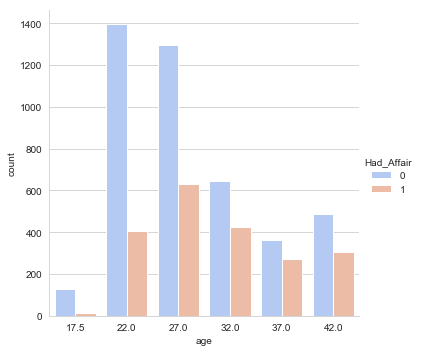

In [6]:
sns.catplot('age', data=df, kind="count", hue='Had_Affair', palette='coolwarm')

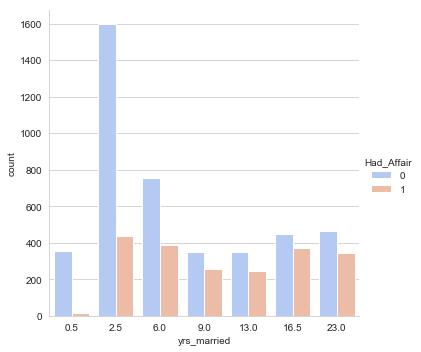

In [7]:
sns.catplot('yrs_married', data=df, kind="count", hue='Had_Affair',palette='coolwarm')

In [8]:
# Data Prep
occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])
occ_dummies.columns = ['occ1','occ2','occ3','occ4','occ5','occ6']
hus_occ_dummies.columns = ['hocc1','hocc2','hocc3','hocc4','hocc5','hocc6']

X = df.drop(['occupation','occupation_husb','Had_Affair', 'affairs'],axis=1)
dummies = pd.concat([occ_dummies,hus_occ_dummies],axis=1)
X = pd.concat([X,dummies],axis=1)
# need to drop 'occ1', 'hocc1' to avoid multicollinearity
X = X.drop(['occ1', 'hocc1'], axis=1)
y = df['Had_Affair']

In [9]:
# Train
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

reg = LogisticRegression(solver='lbfgs', max_iter=10000)
reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
y_pred = reg.predict(X_test)

In [11]:
reg.score(X,y)

0.7247879359095193

In [12]:
y.mean()

0.3224945020420987

In [13]:
coeff_df = DataFrame(zip(X.columns, np.transpose(reg.coef_)))
print(coeff_df)

                0                         1
0   rate_marriage     [-0.6881485126070357]
1             age   [-0.052823225034914385]
2     yrs_married     [0.10374609748501087]
3        children    [-0.01153388010084376]
4       religious     [-0.3948260639195257]
5            educ  [-0.0026889172527140184]
6            occ2     [0.09044945647847763]
7            occ3      [0.3837438548828333]
8            occ4      [0.1557732686901597]
9            occ5      [0.7244999297935035]
10           occ6      [0.9954991652325598]
11          hocc2      [0.0484520960911402]
12          hocc3     [0.21205177513948617]
13          hocc4    [0.021044305534148353]
14          hocc5  [-0.0006139493232526182]
15          hocc6     [-0.0333968894340655]


In [14]:
# Evaluate
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1291  139]
 [ 428  264]]


In [15]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.4821917808219178

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82      1430
           1       0.66      0.38      0.48       692

   micro avg       0.73      0.73      0.73      2122
   macro avg       0.70      0.64      0.65      2122
weighted avg       0.72      0.73      0.71      2122



In [17]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))

0.732799245994345
